# **Mushroom Data Classification**
In this project our aim is to classify the mushroom based on its morphological features, whether its Edible or Poisonous. The dataset consist of 8124 Rows and 23 Columns .

In [77]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## 1. Data Exploration & Analysis
Initially we will import, explore, analyse the data & clear it for further model training .

In [78]:
data=pd.read_csv("/content/drive/MyDrive/agaricus-lepiota[2].data",header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [79]:
data.columns=[
    "Class",
    "cap-shape",
    "cap-surface",
    "cap-color",
    "bruises",
    "odor",
    "gill-attachment",
    "gill-spacing",
    "gill-size",
    "gill-color",
    "stalk-shape",
    "stalk-root",
    "stalk-surface-above-ring",
    "stalk-surface-below-ring",
    "stalk-color-above-ring",
    "stalk-color-below-ring",
    "veil-type",
    "veil-color",
    "ring-number",
    "ring-type",
    "spore-print-color",
    "population",
    "habitat"
]
data.head()

,Class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [81]:
data.describe()

,Class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [82]:
data.isnull().sum()

,0
Class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


In [83]:
for col in data.columns:
  print(col,data[col].unique())

Class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [84]:
(data=="?").sum()

,0
Class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


In [85]:
data=data.replace("?",np.nan)
data["stalk-root"]

,stalk-root
0,e
1,c
2,c
3,e
4,e
...,...
8119,NaN
8120,NaN
8121,NaN
8122,NaN


In [86]:
data["stalk-root"].mode()

,stalk-root
0,b


In [87]:
data["stalk-root"].fillna(data["stalk-root"].mode()[0],inplace=True)
data["stalk-root"]

,stalk-root
0,e
1,c
2,c
3,e
4,e
...,...
8119,b
8120,b
8121,b
8122,b


/tmp/ipython-input-4029470109.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8,6))


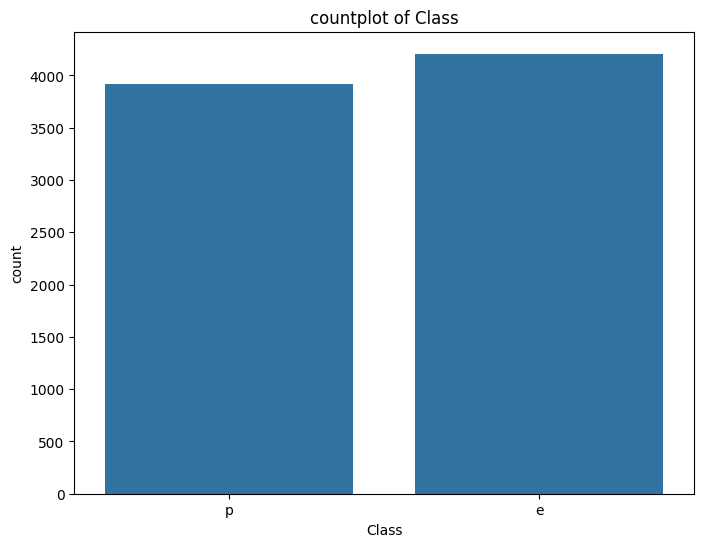

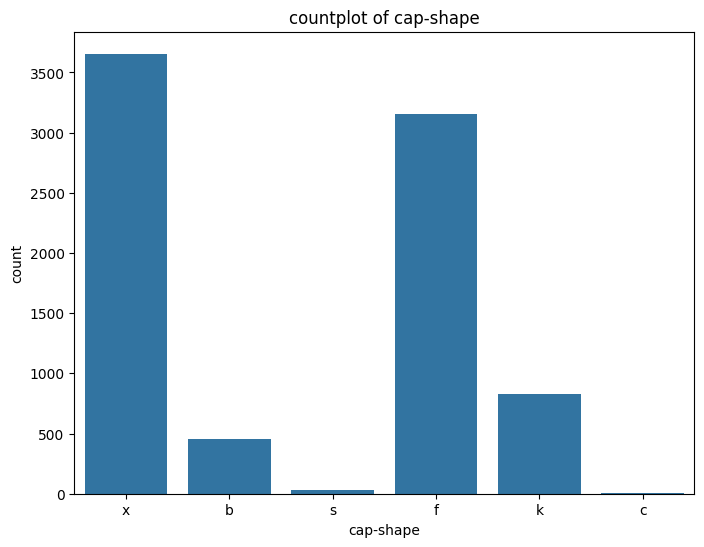

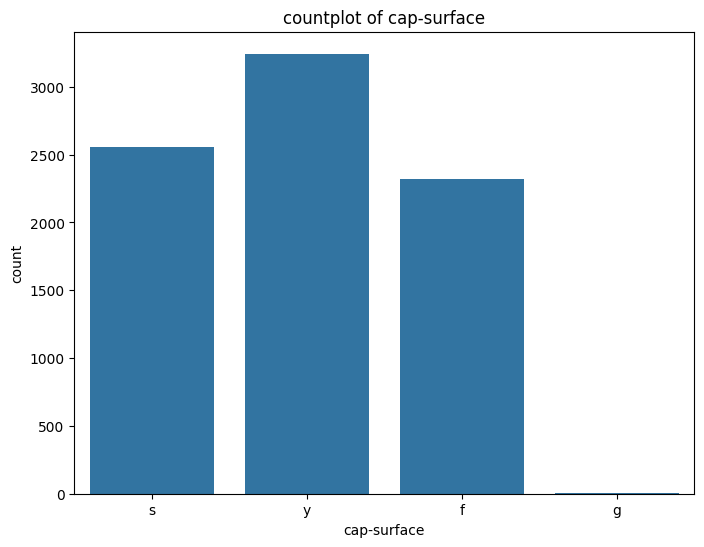

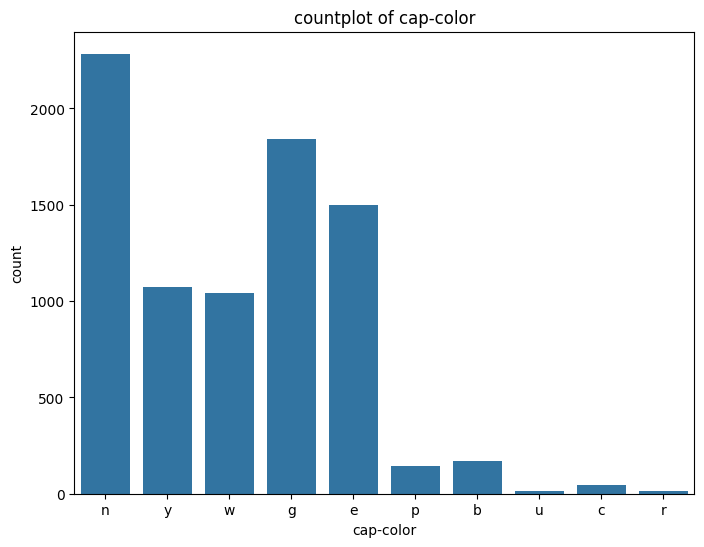

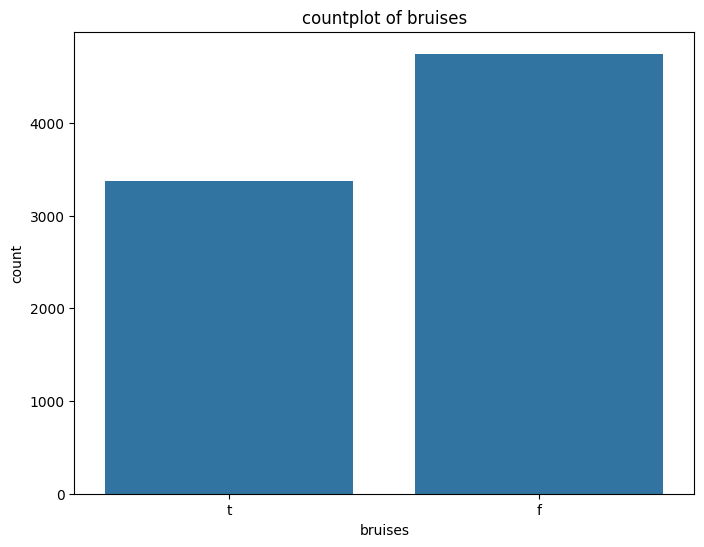

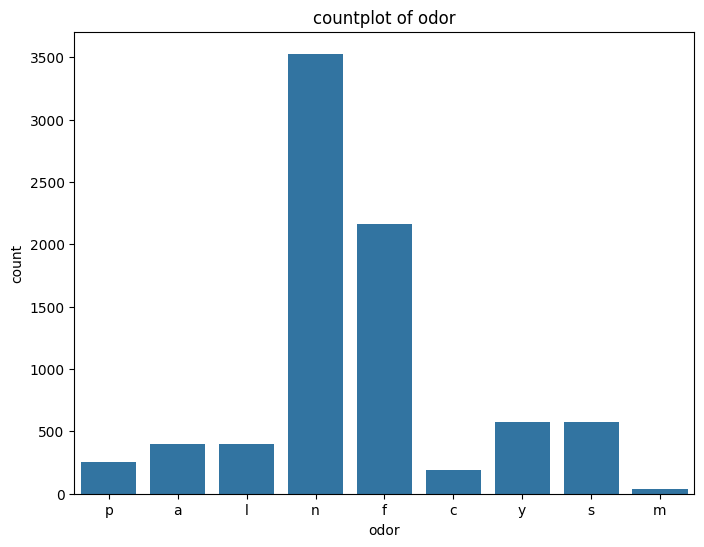

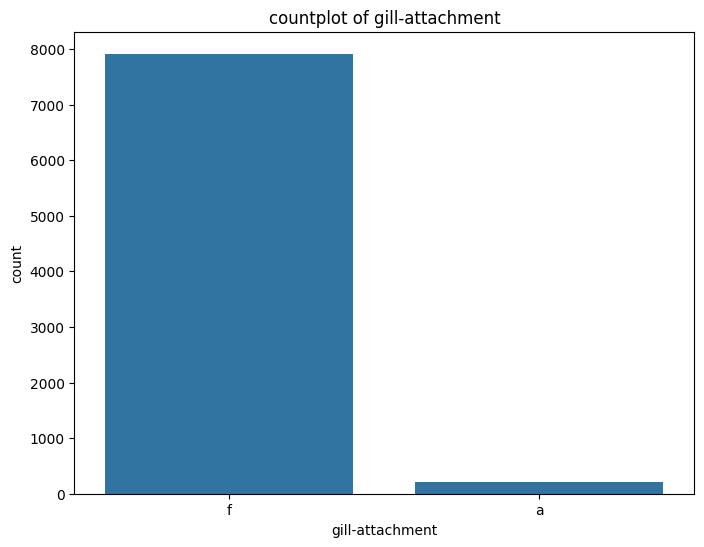

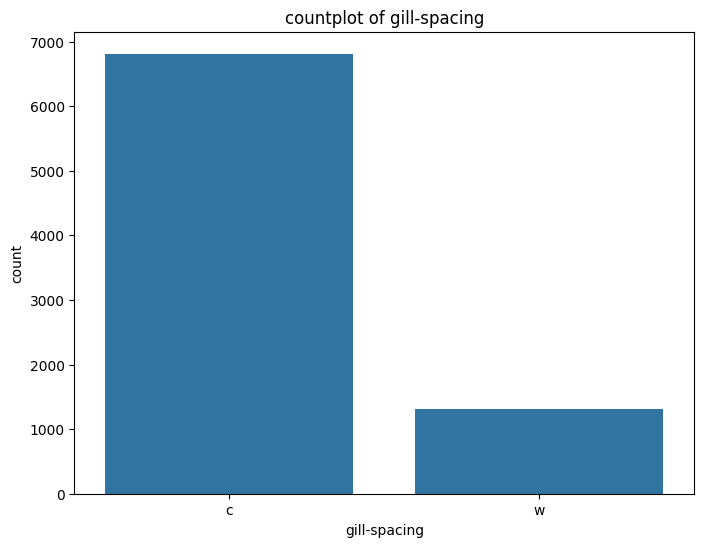

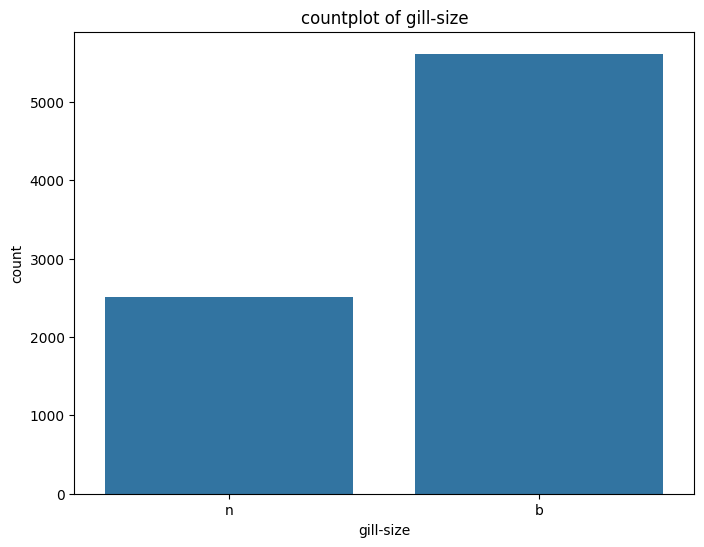

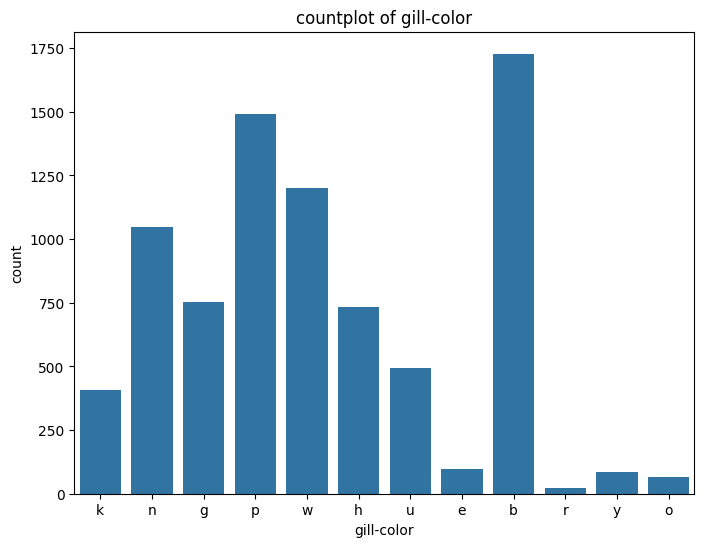

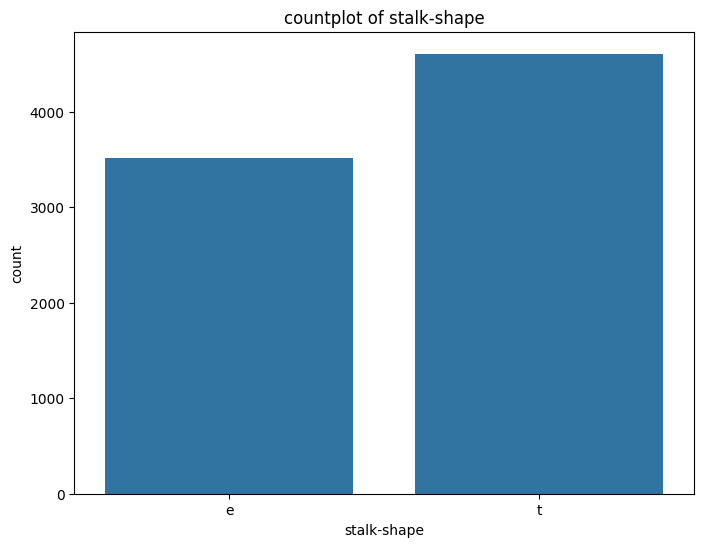

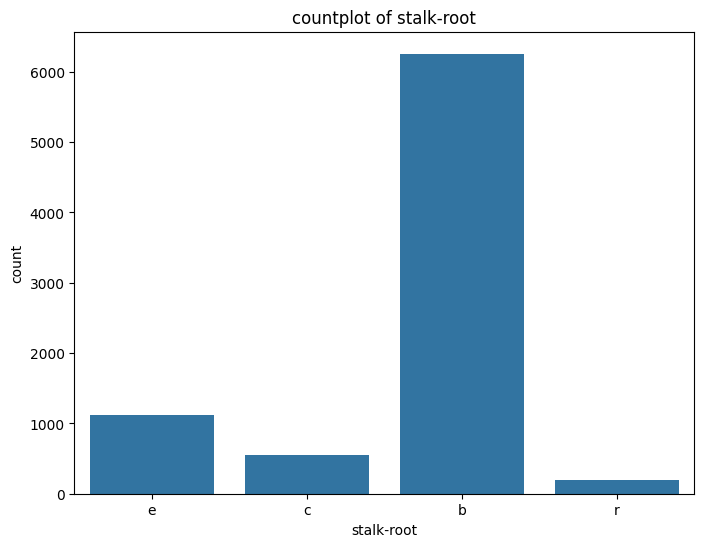

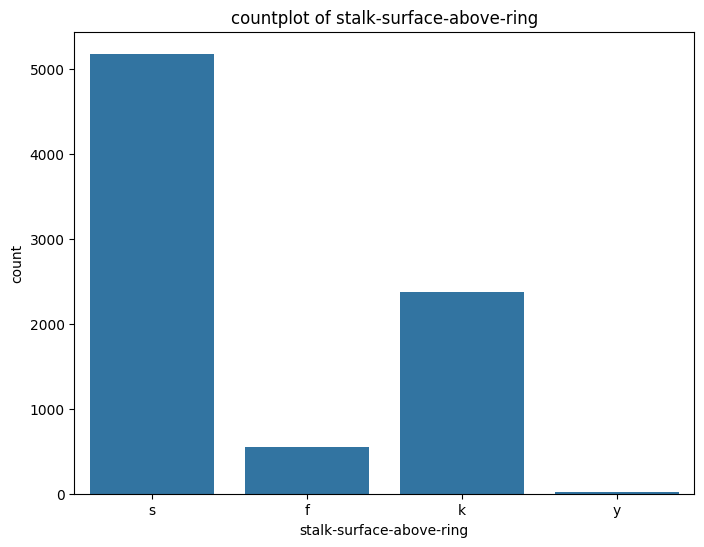

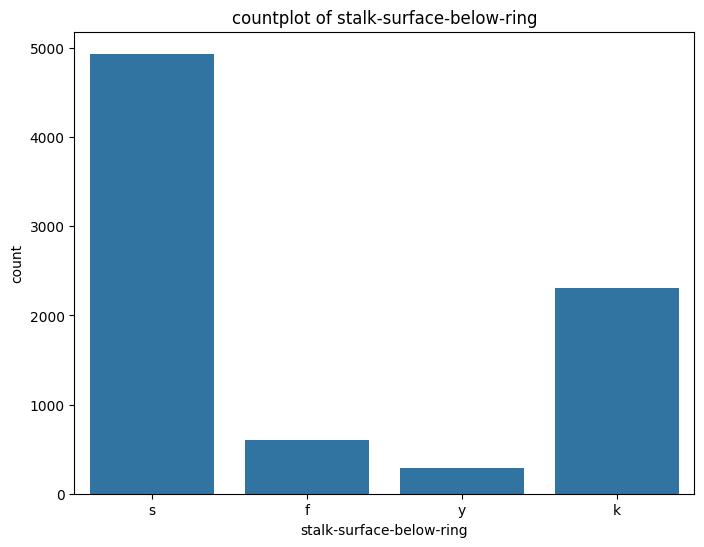

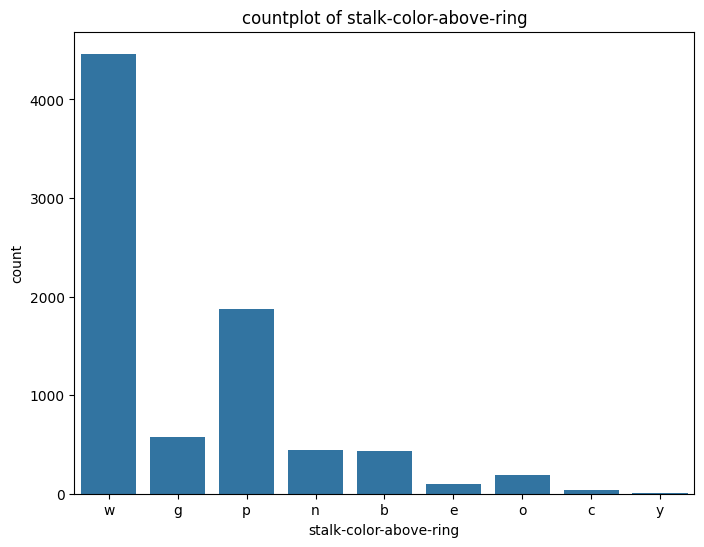

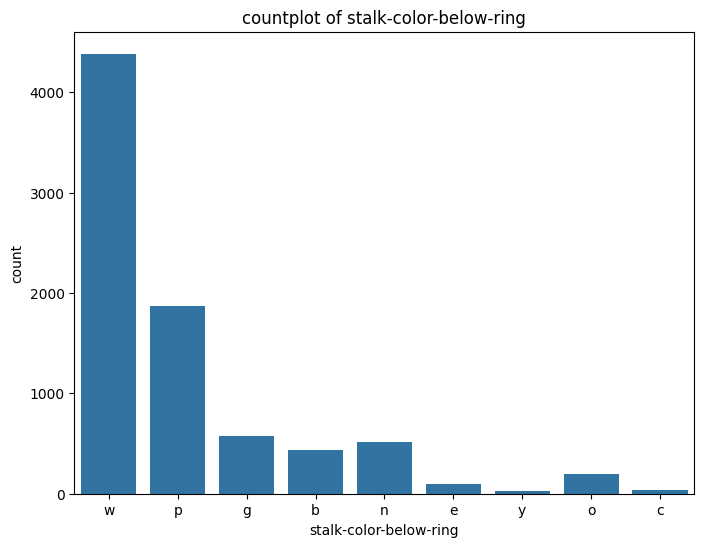

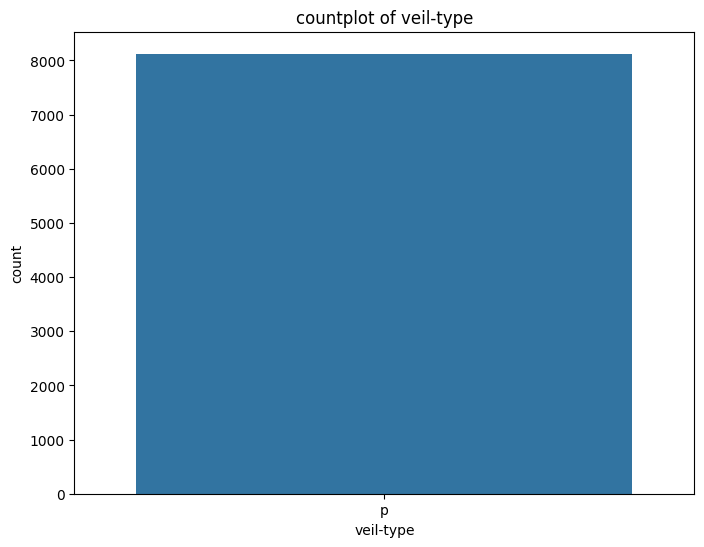

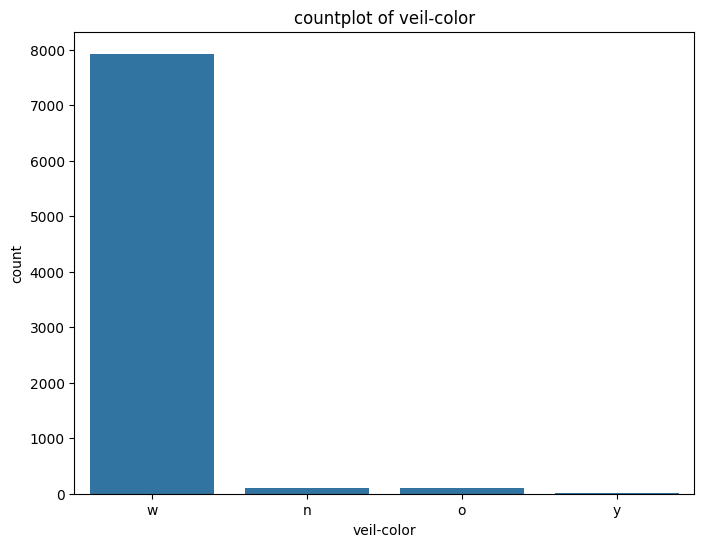

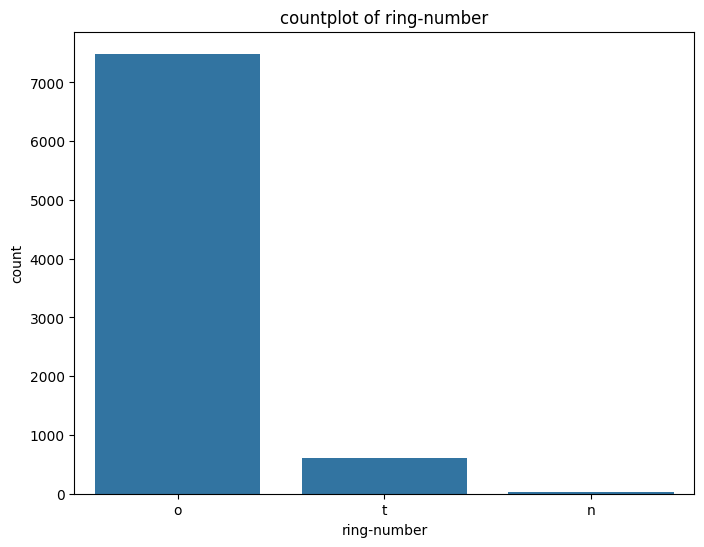

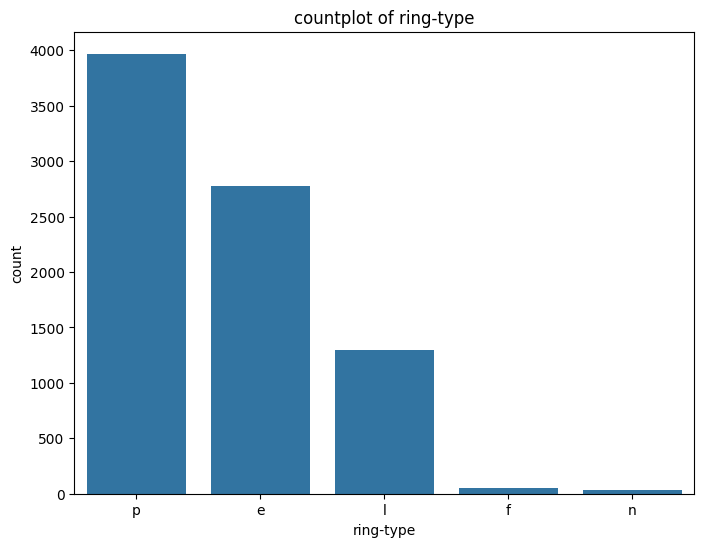

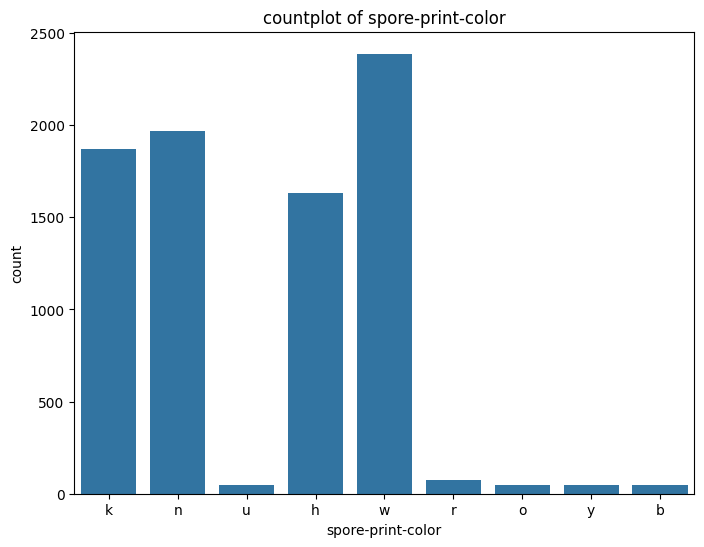

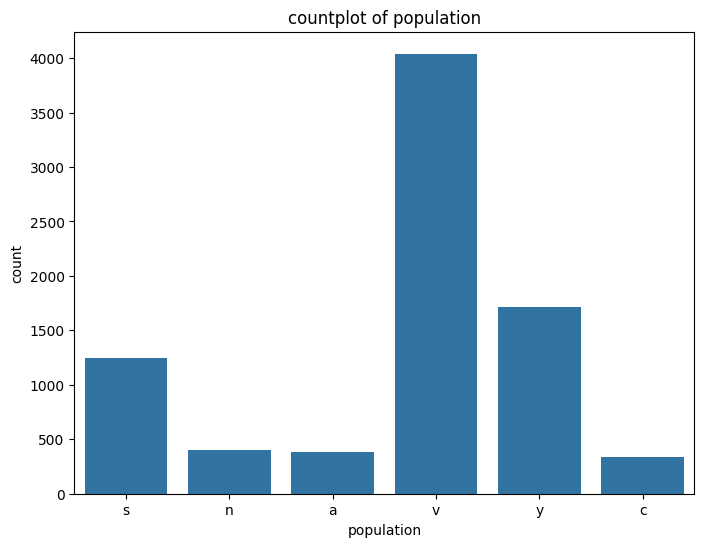

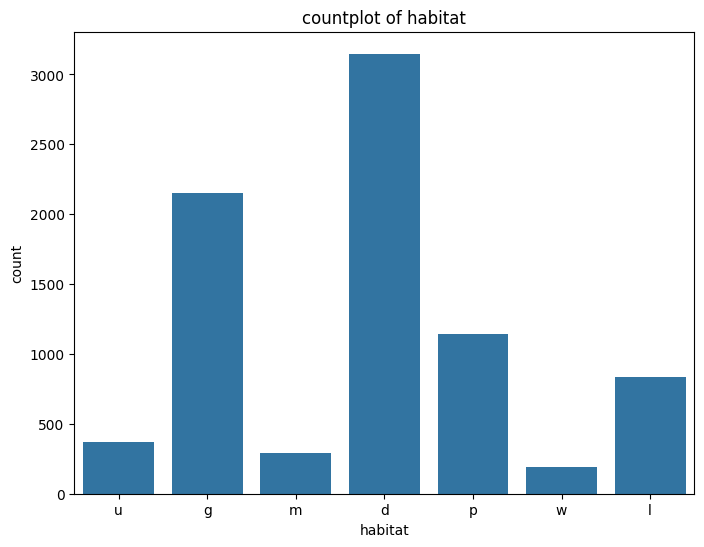

In [88]:
for col in data.columns:
  plt.figure(figsize=(8,6))
  sns.countplot(x=col,data=data)
  plt.title(f"countplot of {col}")
plt.show()

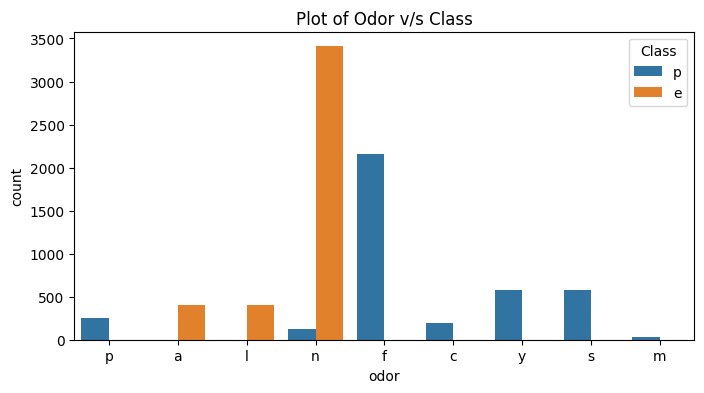

In [89]:
plt.figure(figsize=(8,4))
sns.countplot(x="odor",hue='Class',data=data)
plt.title("Plot of Odor v/s Class")
plt.show()

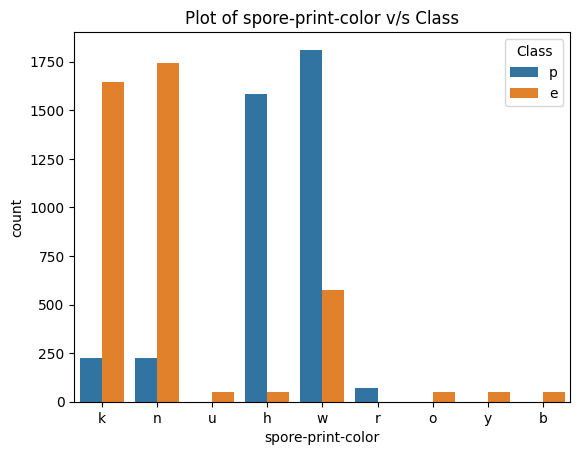

In [90]:
sns.countplot(x='spore-print-color',hue='Class',data=data)
plt.title("Plot of spore-print-color v/s Class")
plt.show()

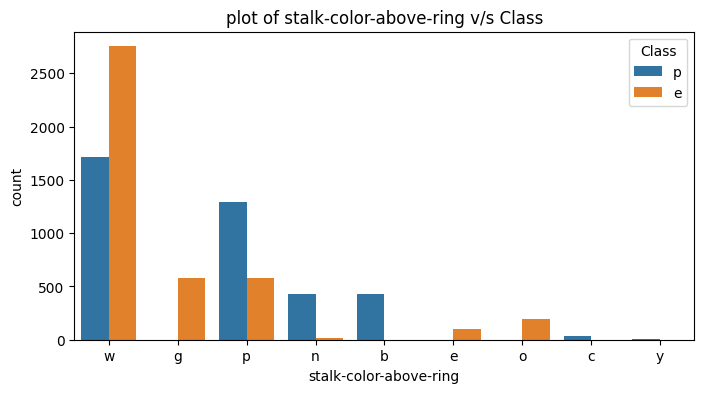

In [91]:
plt.figure(figsize=(8,4))
sns.countplot(x="stalk-color-above-ring",hue="Class",data=data)
plt.title("plot of stalk-color-above-ring v/s Class")
plt.show()

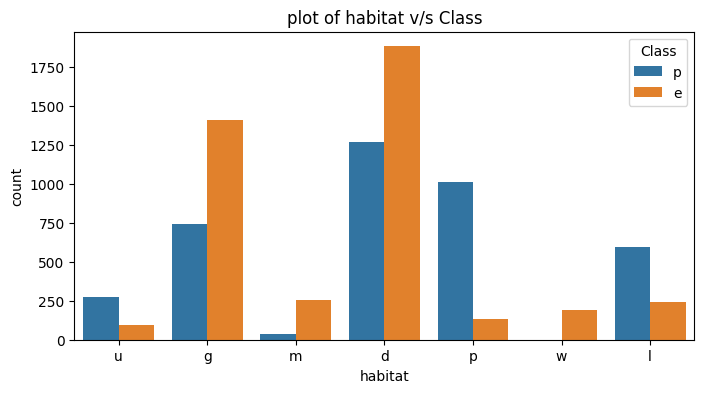

In [92]:
plt.figure(figsize=(8,4))
sns.countplot(x="habitat",hue="Class",data=data)
plt.title("plot of habitat v/s Class")
plt.show()

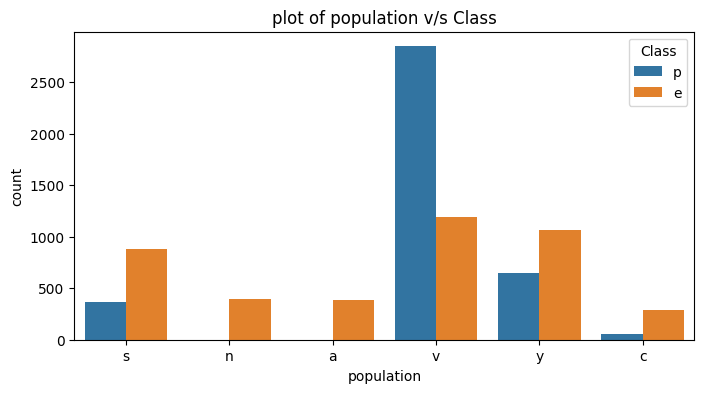

In [93]:
plt.figure(figsize=(8,4))
sns.countplot(x="population",hue="Class",data=data)
plt.title("plot of population v/s Class")
plt.show()

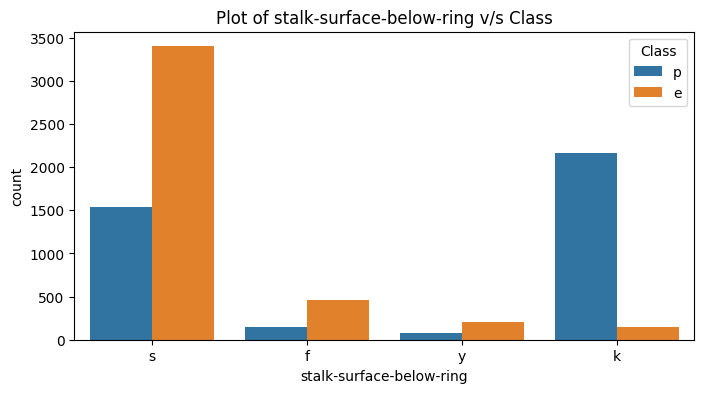

In [94]:
plt.figure(figsize=(8,4))
sns.countplot(x='stalk-surface-below-ring',hue='Class',data=data)
plt.title("Plot of stalk-surface-below-ring v/s Class")
plt.show()

In [95]:
# Label Encoding
le_dict = {}  # created dictionary to store encoding data of each column.
le_target = LabelEncoder()
for col in data.columns:
  if col!= 'Class':
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    le_dict[col] = le

  else:
      data[col] = le_target.fit_transform(data[col])
print("All feature columns encoded and stored in le_dict.")
print("Target column 'Class' encoded using le_target.")


All feature columns encoded and stored in le_dict.
Target column 'Class' encoded using le_target.


In [96]:
data.head()

,Class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


## 2. Classify Model

First, divided the data into 2 sets , X independent variable and Y dependent variable (which is target) . and split into 80-20% . 80% data for training and remaining 20% data is for testing.

In [97]:
from sklearn.model_selection import train_test_split
X = data.drop("Class",axis=1)
y = data["Class"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [98]:
# Standardization because logistic regression is a distance based algorithm.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**# Logistic Regression**

In [99]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled,y_train)
y_pred_log = lr_model.predict(X_test_scaled)

In [100]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix,ConfusionMatrixDisplay
print("Accuracy_score:",accuracy_score(y_test,y_pred_log))
print("Recall:",recall_score(y_test,y_pred_log))
print("Precision:",precision_score(y_test,y_pred_log))
print("F1:",f1_score(y_test,y_pred_log))
print("Confusion_Matrix:\n", confusion_matrix(y_test,y_pred_log))

Accuracy_score: 0.9643076923076923
Recall: 0.9731457800511509
Precision: 0.9536340852130326
F1: 0.9632911392405064
Confusion_Matrix:
 [[806  37]
 [ 21 761]]


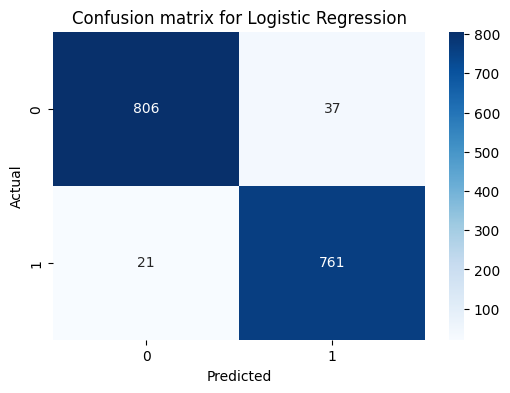

In [114]:
# Confusion Matrix - Logistic regression.
cm = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for Logistic Regression')
plt.show()

**# Decision Tree Classification**

In [102]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred_tree = dt_model.predict(X_test)

In [103]:
print("Accuracy:",accuracy_score(y_test,y_pred_tree))
print("Recall:",recall_score(y_test,y_pred_tree))
print("Precision:",precision_score(y_test,y_pred_tree))
print("F1_score:",f1_score(y_test,y_pred_tree))
print("Confusion_matrix:\n",confusion_matrix(y_test,y_pred_tree))

Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1_score: 1.0
Confusion_matrix:
 [[843   0]
 [  0 782]]


In [104]:
# Overfitting.
train_acc = accuracy_score(y_train, dt_model.predict(X_train))
test_acc = accuracy_score(y_test, dt_model.predict(X_test))

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Train Accuracy: 1.0
Test Accuracy: 1.0


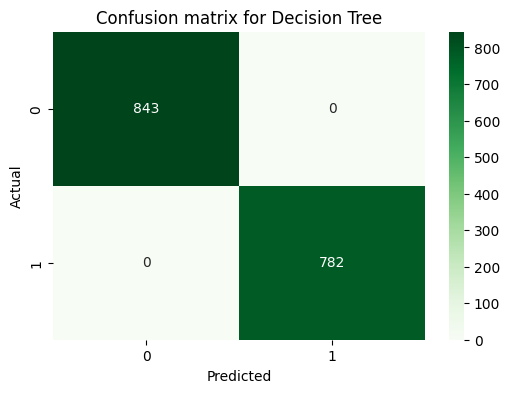

In [105]:
# Confusion matrix - Decision tree
cm2 = confusion_matrix(y_test, y_pred_tree)

plt.figure(figsize=(6, 4))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for Decision Tree')
plt.show()

**# Random Forest Classification**

In [106]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)


In [107]:
print("Accuracy:",accuracy_score(y_test,y_pred_rf))
print("Recall:",recall_score(y_test,y_pred_rf))
print("Precision:",precision_score(y_test,y_pred_rf))
print("F1_score:",f1_score(y_test,y_pred_rf))
print("Confusion_matrix:\n",confusion_matrix(y_test,y_pred_rf))

Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1_score: 1.0
Confusion_matrix:
 [[843   0]
 [  0 782]]


In [108]:
# Overfitting.
train_acc = accuracy_score(y_train, rf_model.predict(X_train))
test_acc = accuracy_score(y_test, rf_model.predict(X_test))

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Train Accuracy: 1.0
Test Accuracy: 1.0


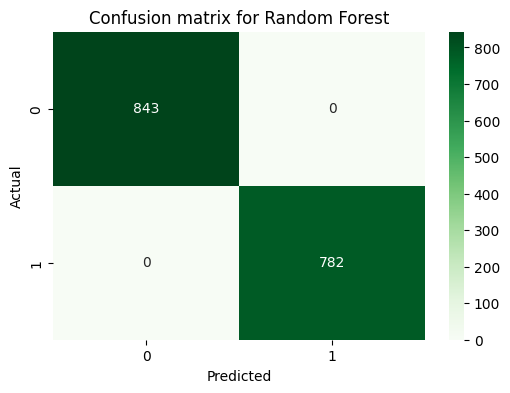

In [109]:
# Confusion matrix - Random forest.
cm3 = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for Random Forest')
plt.show()

**Feature Importance**

                     Feature  Importance
4                       odor    0.170587
8                 gill-color    0.122535
19         spore-print-color    0.102265
7                  gill-size    0.100491
20                population    0.070106
18                 ring-type    0.065596
3                    bruises    0.058445
12  stalk-surface-below-ring    0.051566
11  stalk-surface-above-ring    0.047992
10                stalk-root    0.044243
6               gill-spacing    0.040100
21                   habitat    0.029982
9                stalk-shape    0.020563
17               ring-number    0.017400
14    stalk-color-below-ring    0.016763
2                  cap-color    0.013380
13    stalk-color-above-ring    0.009396
1                cap-surface    0.006952
0                  cap-shape    0.006457
16                veil-color    0.003100
5            gill-attachment    0.002081
15                 veil-type    0.000000


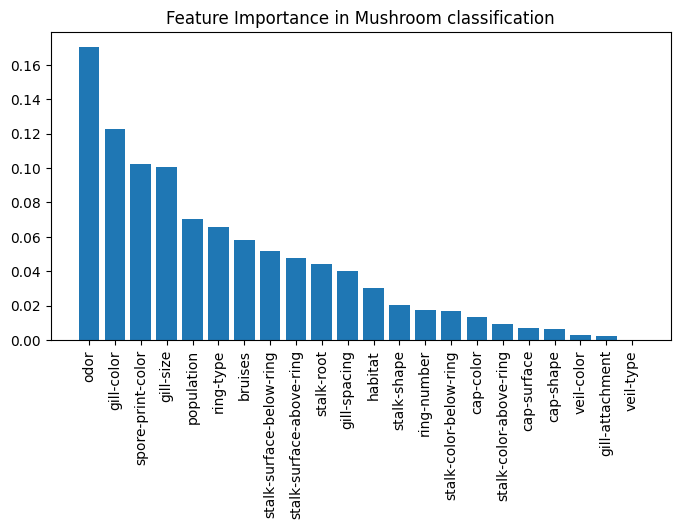

In [110]:
importances = rf_model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance',ascending=False)

print(importance_df)

plt.figure(figsize=(8,4))
plt.bar(importance_df['Feature'],importance_df['Importance'])
plt.xticks(rotation=90)
plt.title("Feature Importance in Mushroom classification")
plt.show()

From the above graph, we can clearly see that features like gill-size, odor, gill-color, spore-print-color, & ring-type etc are really important in order to achieve better results or get the highest accuracy because this are the features that contribute the most to classify whether a Mushroom is Edible or Poisonous.

In [111]:
# Comparison matrix of Accuracy, Recall, Precision & F1 score.
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Example assuming you already have predictions: y_pred_log, y_pred_tree, y_pred_rf
results = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_tree),
        accuracy_score(y_test, y_pred_rf)
    ],
    "Precision": [
        precision_score(y_test, y_pred_log),
        precision_score(y_test, y_pred_tree),
        precision_score(y_test, y_pred_rf)
    ],
    "Recall": [
        recall_score(y_test, y_pred_log),
        recall_score(y_test, y_pred_tree),
        recall_score(y_test, y_pred_rf)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_log),
        f1_score(y_test, y_pred_tree),
        f1_score(y_test, y_pred_rf)
    ]
}

df_results = pd.DataFrame(results)
print(df_results)


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.964308   0.953634  0.973146  0.963291
1        Decision Tree  1.000000   1.000000  1.000000  1.000000
2        Random Forest  1.000000   1.000000  1.000000  1.000000


In [112]:
new_mushroom = {
    "cap-shape":'f',
    "cap-surface":'y',
    "cap-color":'r',
    "bruises":'f',
    "odor":'p',
    "gill-attachment":'a',
    "gill-spacing":'w',
    "gill-size":'n',
    "gill-color":'b',
    "stalk-shape":'t',
    "stalk-root":'c',
    "stalk-surface-above-ring":'y',
    "stalk-surface-below-ring":'y',
    "stalk-color-above-ring":'n',
    "stalk-color-below-ring":'n',
    "veil-type":'p',
    "veil-color":'w',
    "ring-number":'o',
    "ring-type":'l',
    "spore-print-color":'r',
    "population":'c',
    "habitat":'m',

}

# Converting into data frame.
new_data = pd.DataFrame([new_mushroom])

# applying label encoding

for col in new_data.columns:
  if col in le_dict:
    val = new_data[col].iloc[0]
    if val in le_dict[col].classes_:
      new_data[col] = le_dict[col].transform(new_data[col])
    else:
      new_data[col] = [le_dict[col].transform([le_dict[col].classes_[0]])[0]]

new_data = new_data[X_train.columns].astype(float)


  # Prediction
pred = rf_model.predict(new_data)

if pred[0] == le_target.transform(['p'])[0]:
    print("Poisonous Mushroom")
else:
    print("Edible Mushroom")

Poisonous Mushroom


# **Conclusion -**
Out of 3 models - Logistic regression, Decision tree & Random forest.
Used Random Forest which is giving 100% Accuracy .